In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random
from sklearn.mixture import GaussianMixture
from scipy.stats import gompertz
from sklearn import mixture

random.seed(10)

In [2]:
path = 'C:\\Users\\w10\\Downloads\\widsdatathon2022\\train.csv'
train = pd.read_csv(path, sep=',') 
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [226]:
train[train.floor_area>6000000]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
16374,1,State_6,Commercial,Education_College_or_university,6385382.0,NaN,NaN,42.7,6,29.677419,...,84,16,1,0,1.0,1.0,1.0,12.0,206.900000,16374
16412,1,State_6,Commercial,Education_College_or_university,6385382.0,NaN,NaN,42.7,6,29.677419,...,84,16,1,0,1.0,1.0,1.0,12.0,206.900000,16412
65900,3,State_8,Commercial,Health_Care_Inpatient,6353396.0,1974.0,NaN,3.0,4,32.903226,...,86,16,0,0,350.0,360.0,18.3,65.0,206.030068,65900
66710,4,State_8,Commercial,Health_Care_Inpatient,6353396.0,1974.0,NaN,95.1,3,29.258065,...,93,20,0,0,1.0,1.0,1.0,87.0,158.688289,66710
68585,6,State_8,Commercial,Health_Care_Inpatient,6353396.0,1974.0,NaN,3.0,10,29.709677,...,102,16,0,0,1.0,1.0,1.0,116.0,166.941702,68585


In [235]:
prueba = train[(train.id ==16374) | (train.id ==16412)]
prueba = prueba.drop(['id'], axis = 1)
prueba = prueba.drop_duplicates()
prueba

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
16374,1,State_6,Commercial,Education_College_or_university,6385382.0,NaN,NaN,42.7,6,29.677419,...,0,84,16,1,0,1.0,1.0,1.0,12.0,206.9


In [274]:
p = train.copy()
p = p.drop(['id'], axis =1)
p = p.drop_duplicates()
len(p)


75718

# Análisis por variables

In [4]:
#Valores faltantes
na = pd.DataFrame(train.isna().sum(), columns = ['na'])
na[na.na >0]

,na
year_built,1837
energy_star_rating,26709
direction_max_wind_speed,41082
direction_peak_wind_speed,41811
max_wind_speed,41082
days_with_fog,45796


### Year_Factor
Es el año anonimizado en el que se tomaron los datos. Se toma como factor y no valor numérico, ya que no tiene sentido decir que un año es el doble que otro. ¿Es una variable que aporta? porque únicamente define el año en el que se observaron los factores meteorológicos y de consumo de energía

In [5]:
train.Year_Factor.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

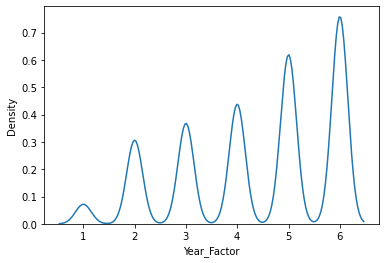

In [6]:
sns.kdeplot(train.Year_Factor)
plt.show()

In [7]:
categorical_features = ['Year_Factor','State_Factor', 'building_class', 'facility_type']

In [8]:
numerical_features = [x for x in train.columns if x not in categorical_features]

No handles with labels found to put in legend.


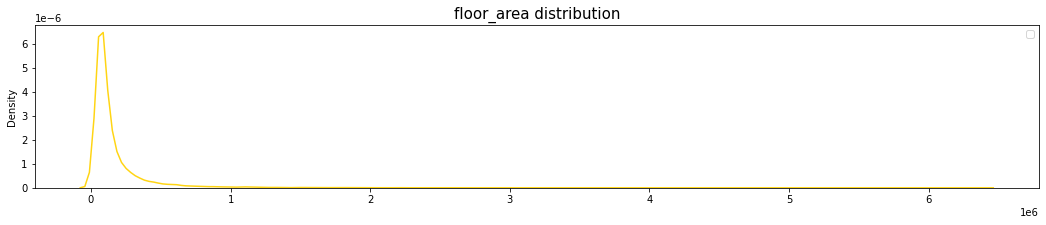

No handles with labels found to put in legend.


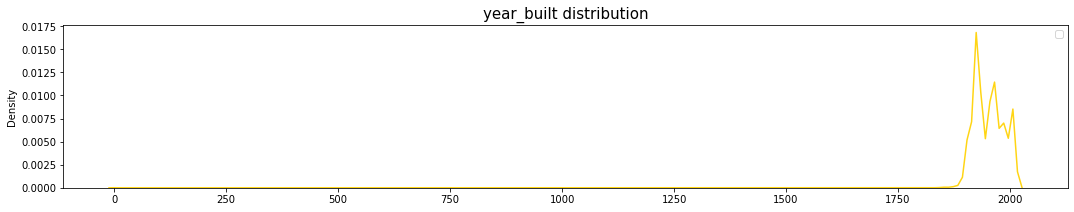

No handles with labels found to put in legend.


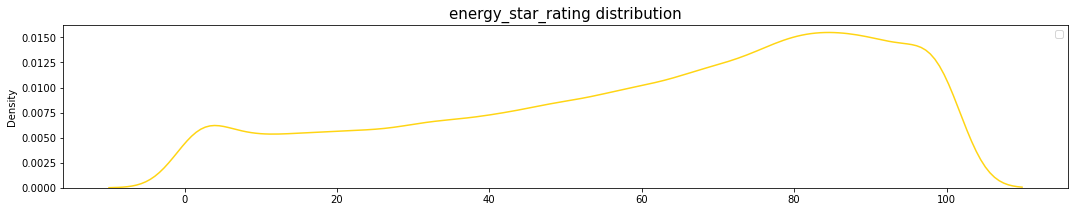

No handles with labels found to put in legend.


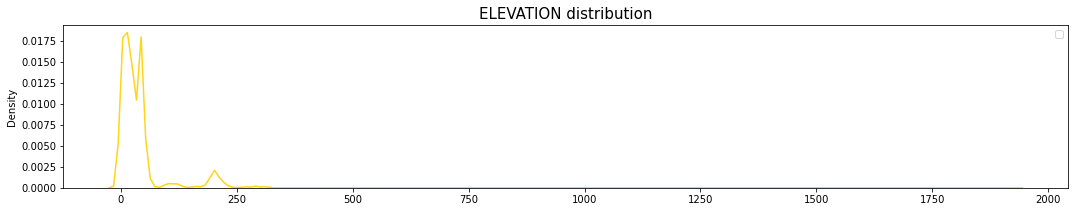

No handles with labels found to put in legend.


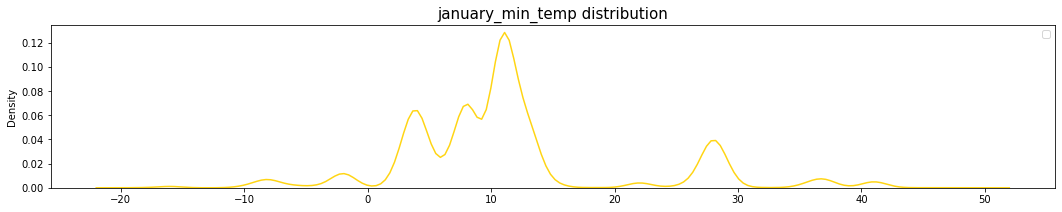

No handles with labels found to put in legend.


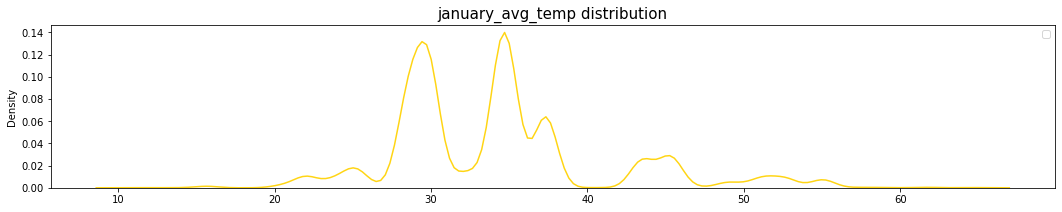

No handles with labels found to put in legend.


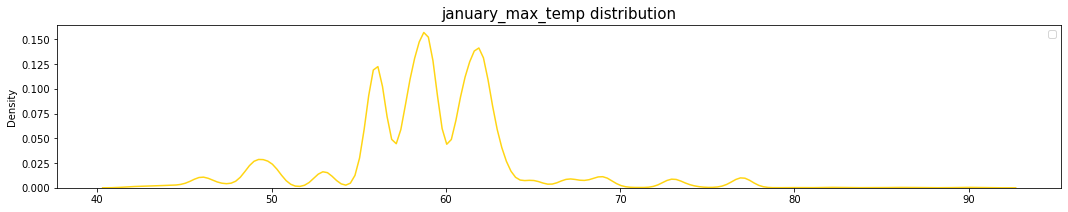

No handles with labels found to put in legend.


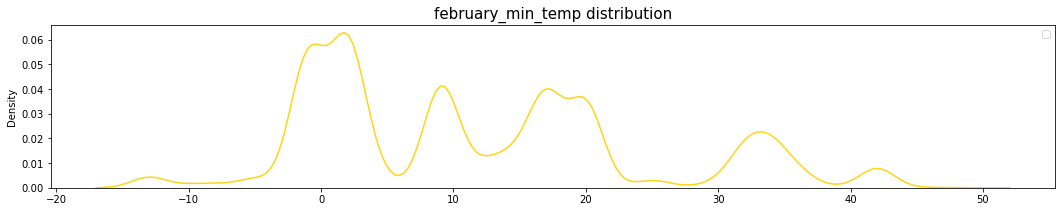

No handles with labels found to put in legend.


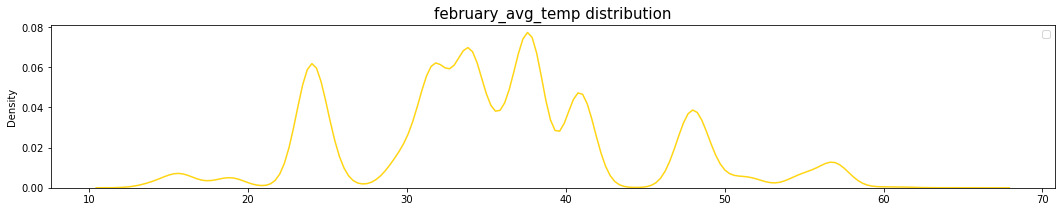

No handles with labels found to put in legend.


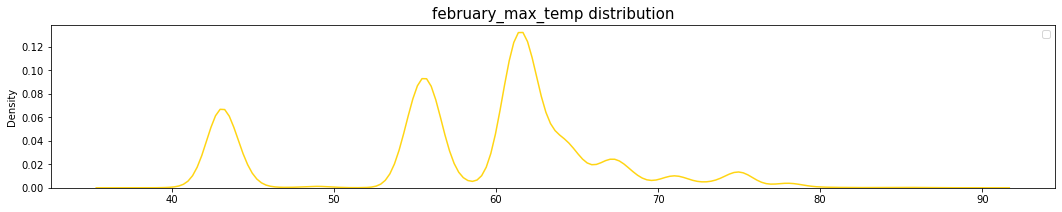

No handles with labels found to put in legend.


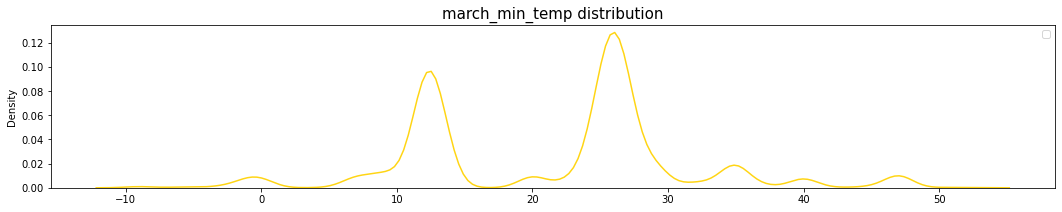

No handles with labels found to put in legend.


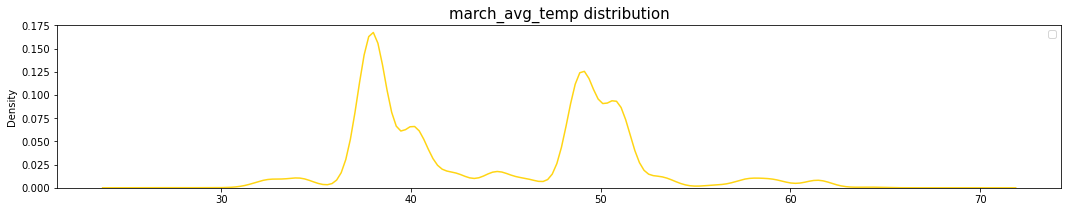

No handles with labels found to put in legend.


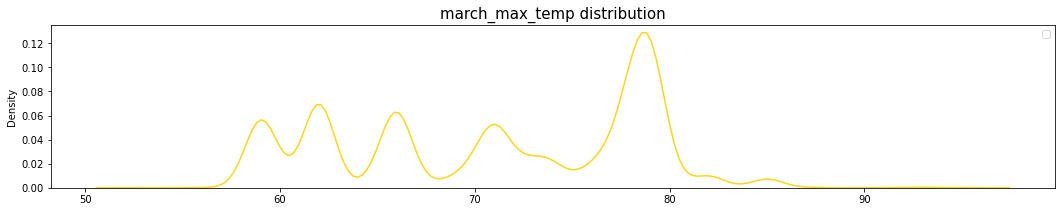

No handles with labels found to put in legend.


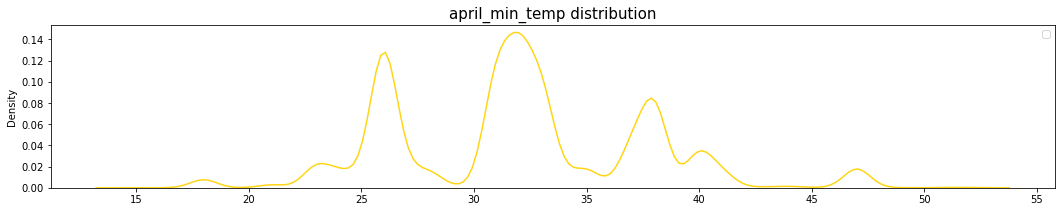

No handles with labels found to put in legend.


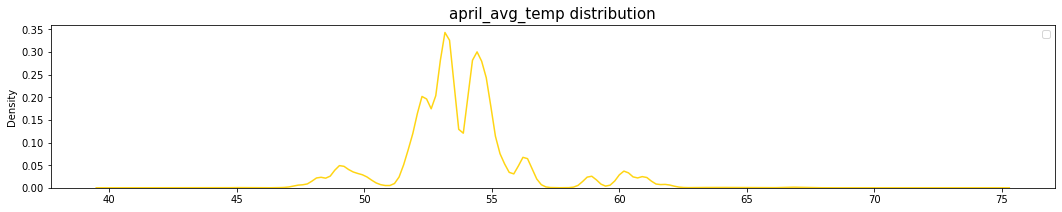

No handles with labels found to put in legend.


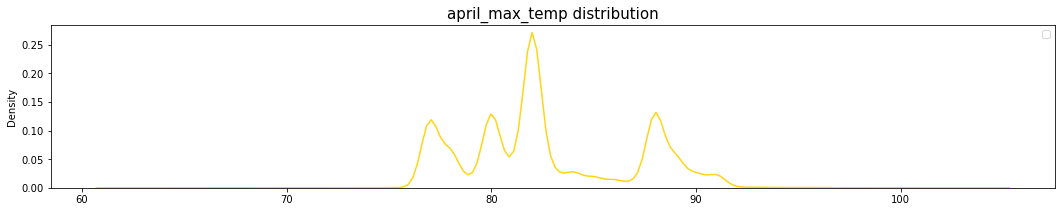

No handles with labels found to put in legend.


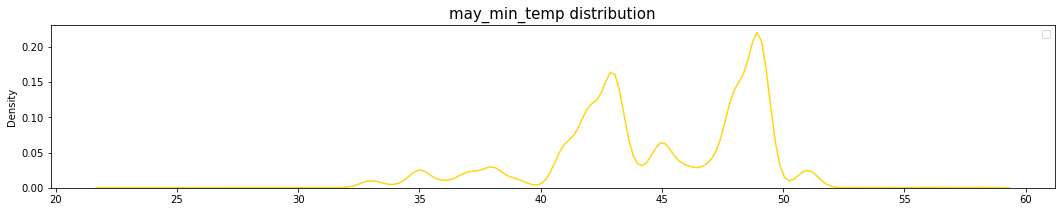

No handles with labels found to put in legend.


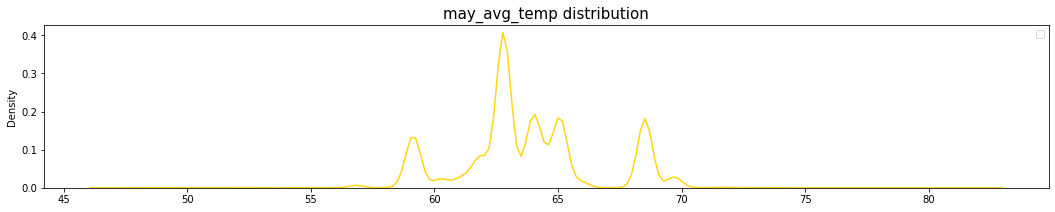

No handles with labels found to put in legend.


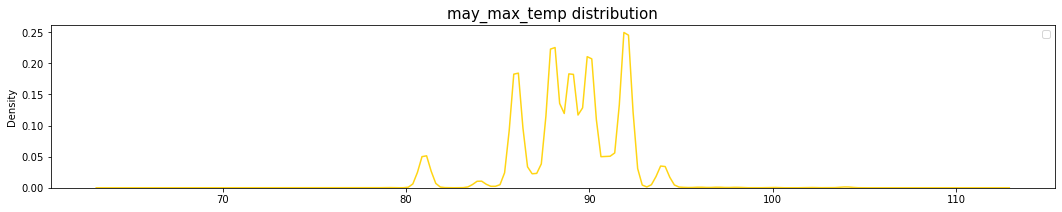

No handles with labels found to put in legend.


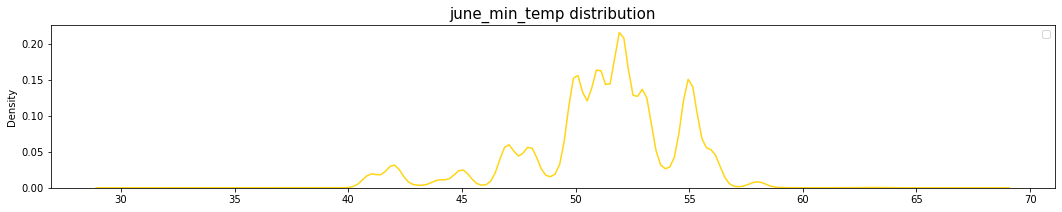

No handles with labels found to put in legend.


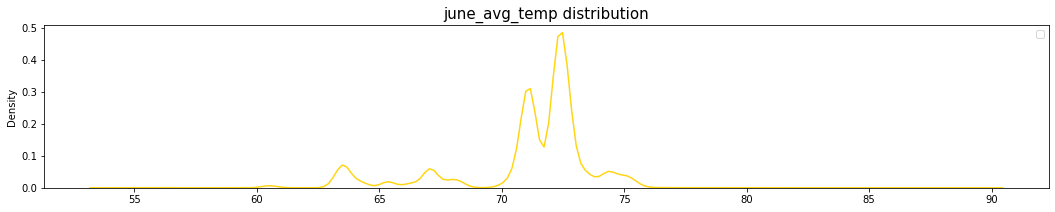

No handles with labels found to put in legend.


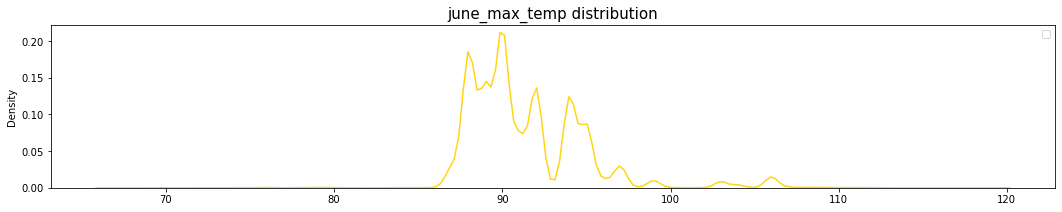

No handles with labels found to put in legend.


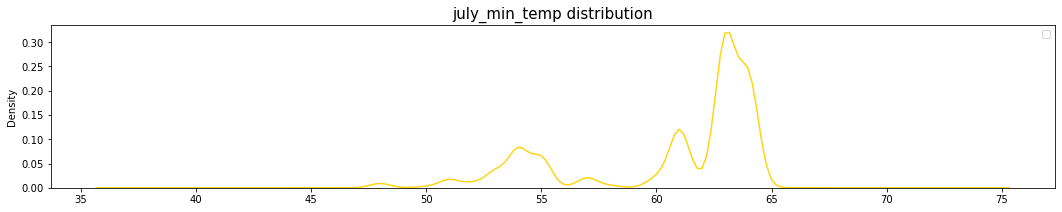

No handles with labels found to put in legend.


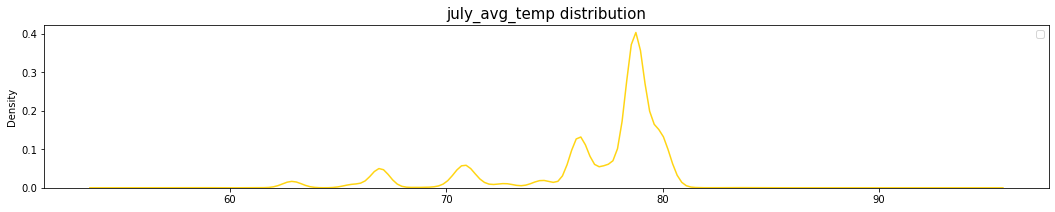

No handles with labels found to put in legend.


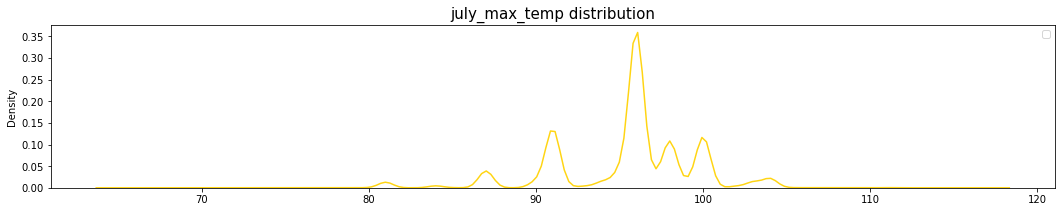

No handles with labels found to put in legend.


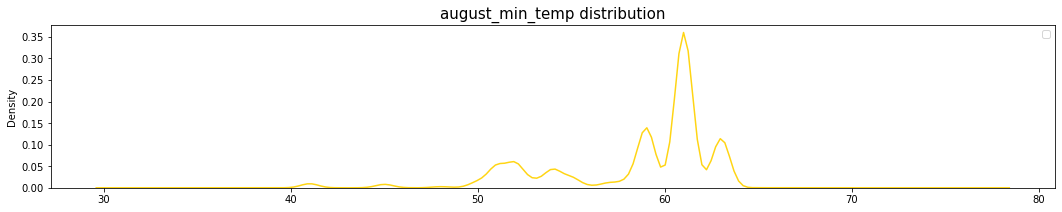

No handles with labels found to put in legend.


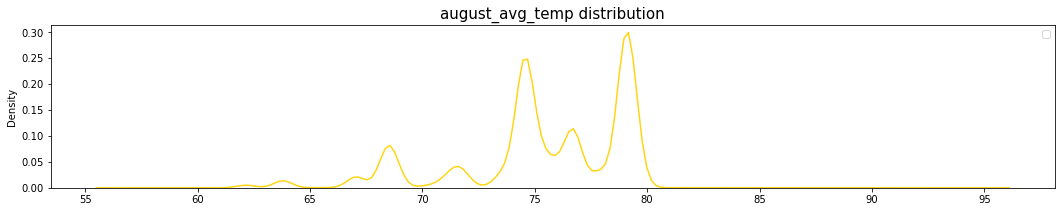

No handles with labels found to put in legend.


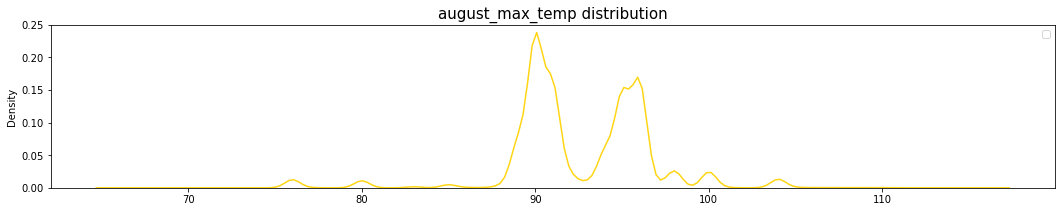

No handles with labels found to put in legend.


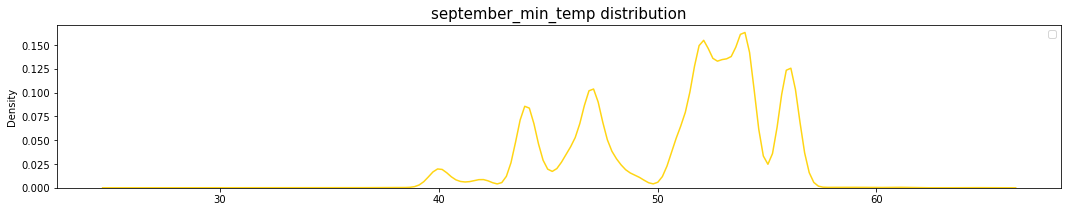

No handles with labels found to put in legend.


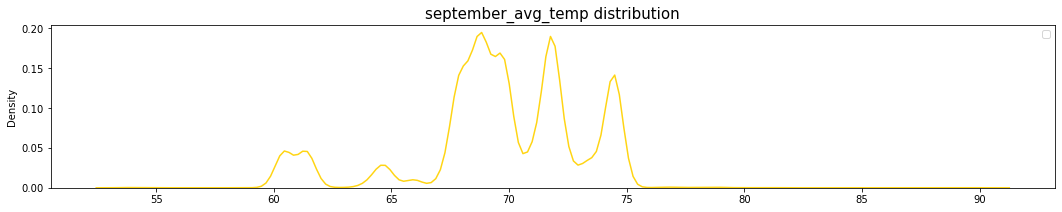

No handles with labels found to put in legend.


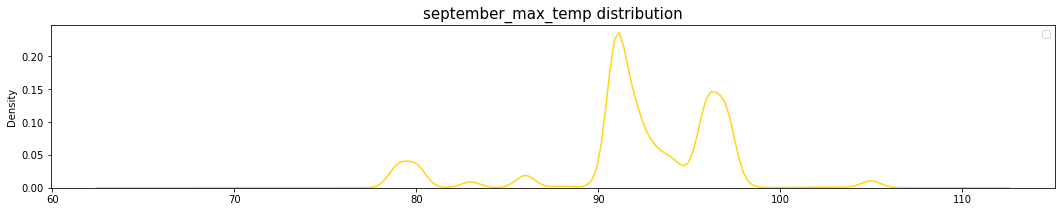

No handles with labels found to put in legend.


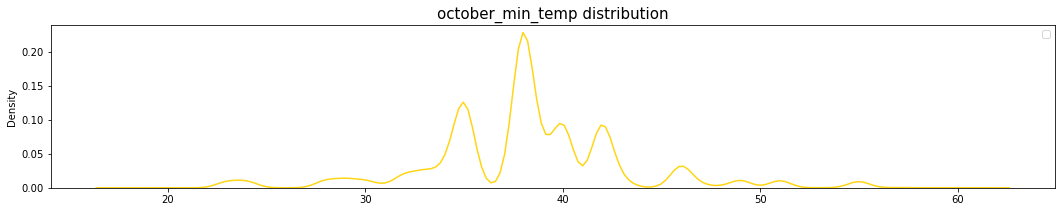

No handles with labels found to put in legend.


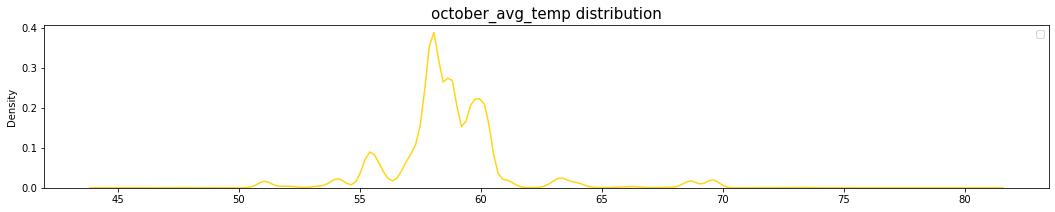

No handles with labels found to put in legend.


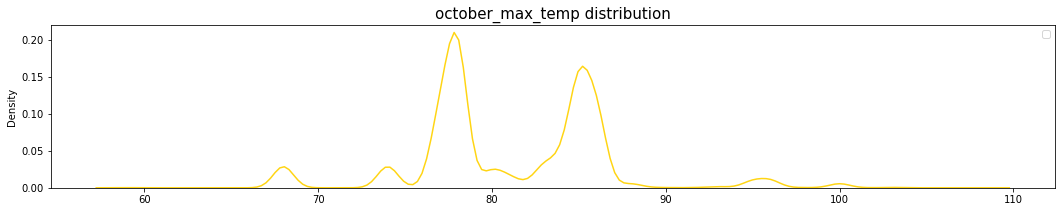

No handles with labels found to put in legend.


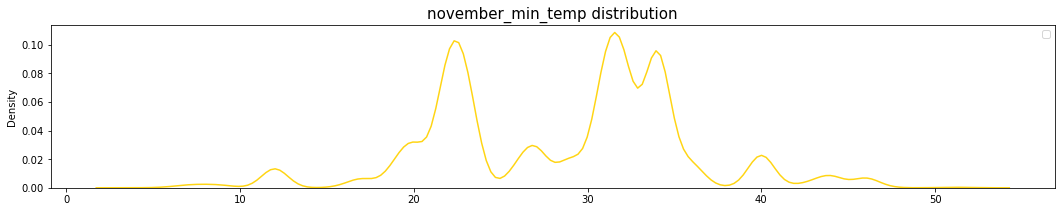

No handles with labels found to put in legend.


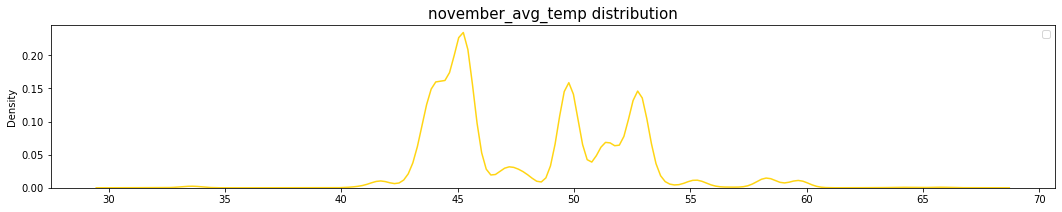

No handles with labels found to put in legend.


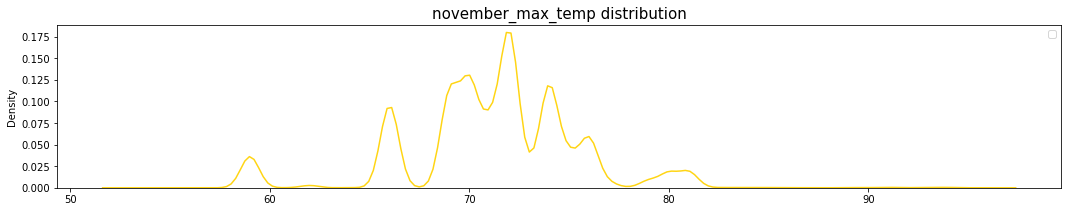

No handles with labels found to put in legend.


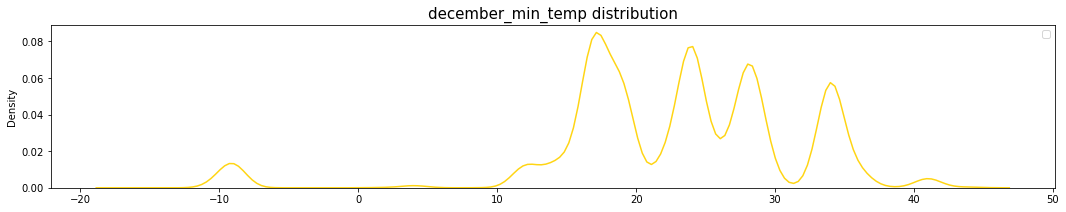

No handles with labels found to put in legend.


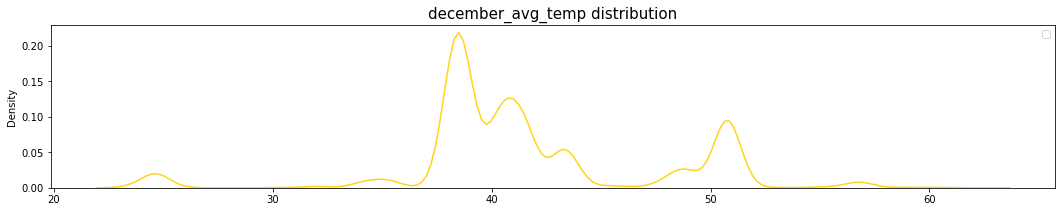

No handles with labels found to put in legend.


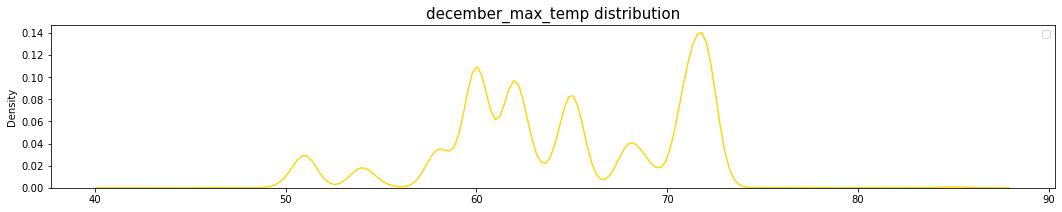

No handles with labels found to put in legend.


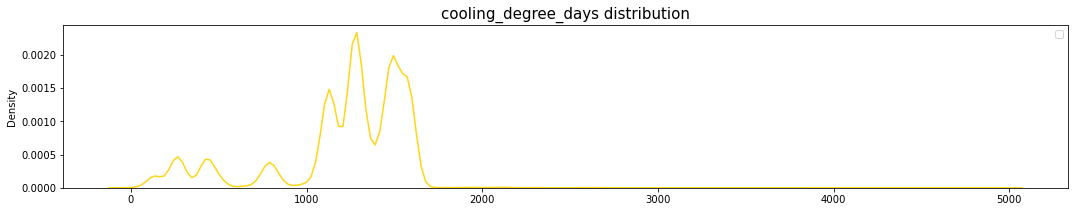

No handles with labels found to put in legend.


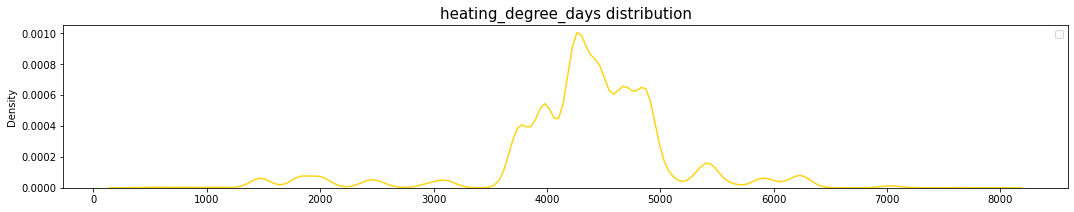

No handles with labels found to put in legend.


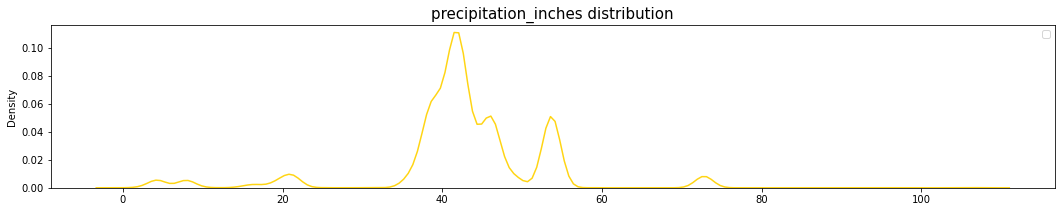

No handles with labels found to put in legend.


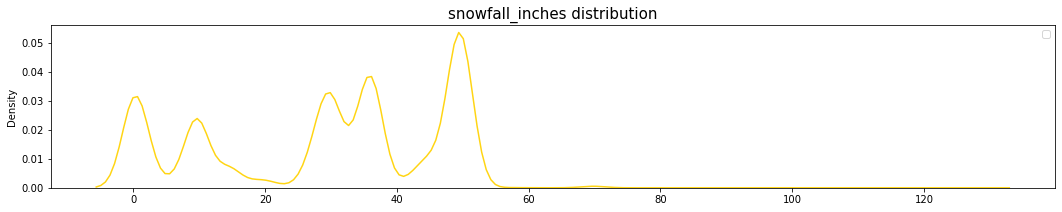

No handles with labels found to put in legend.


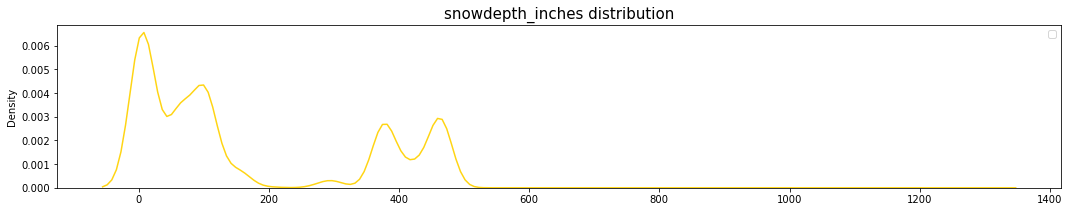

No handles with labels found to put in legend.


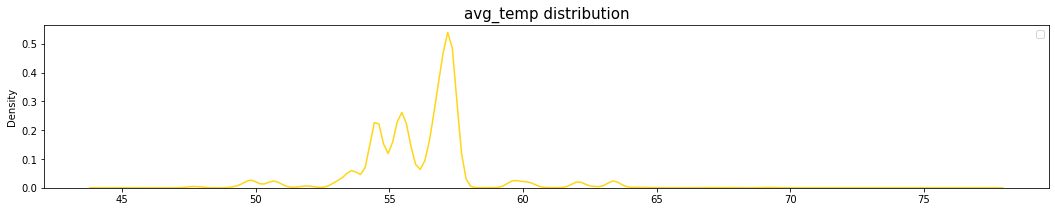

No handles with labels found to put in legend.


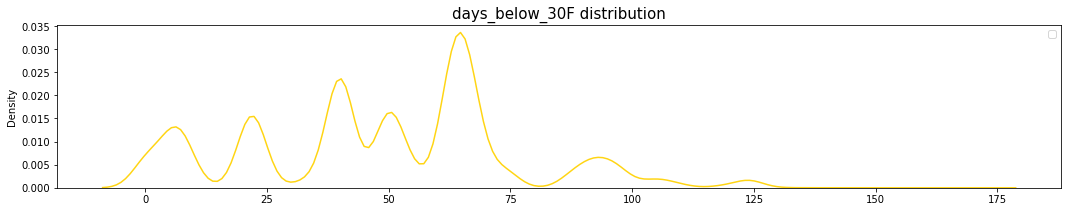

No handles with labels found to put in legend.


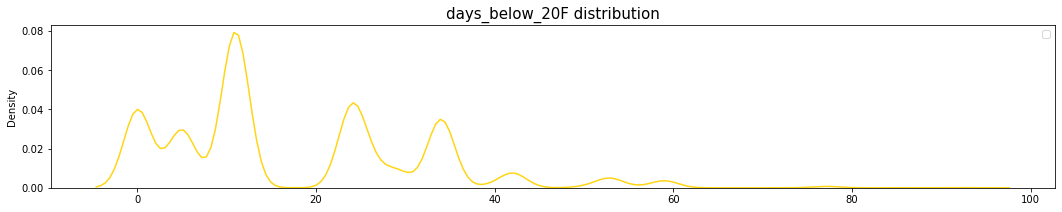

No handles with labels found to put in legend.


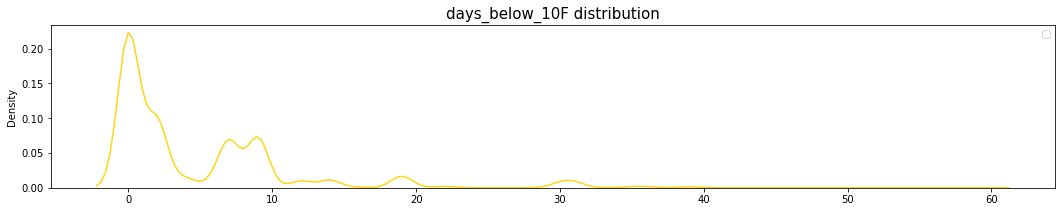

No handles with labels found to put in legend.


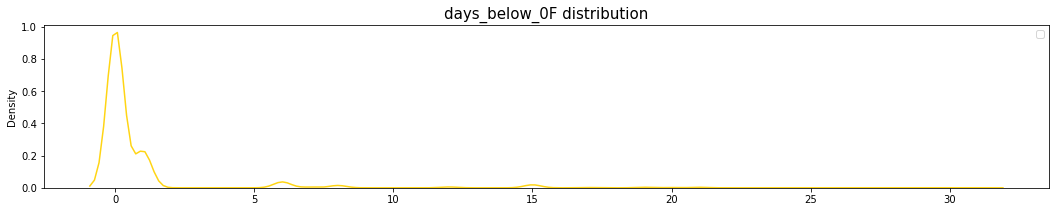

No handles with labels found to put in legend.


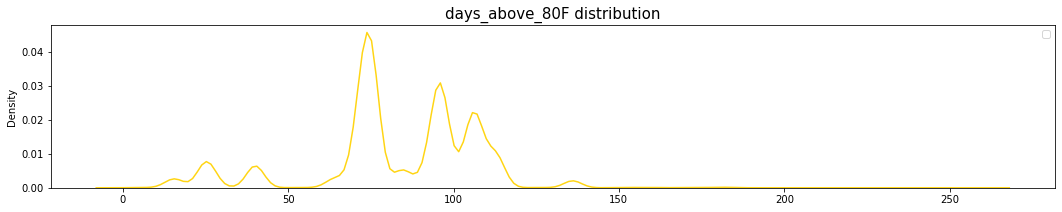

No handles with labels found to put in legend.


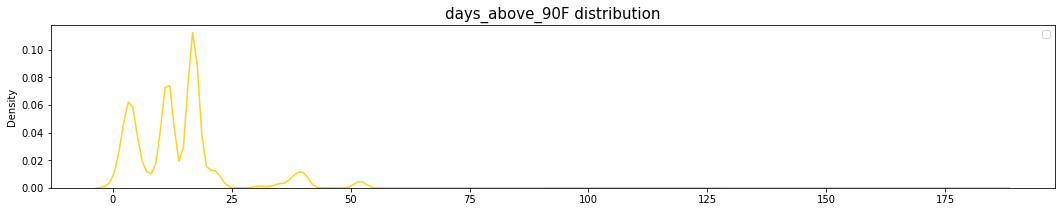

No handles with labels found to put in legend.


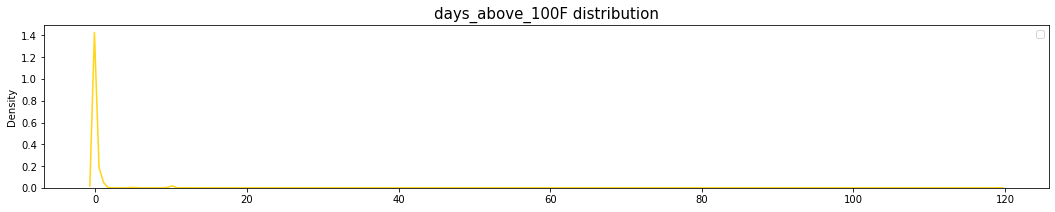

No handles with labels found to put in legend.


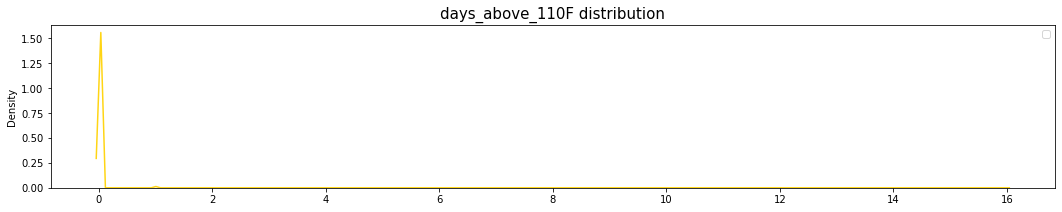

No handles with labels found to put in legend.


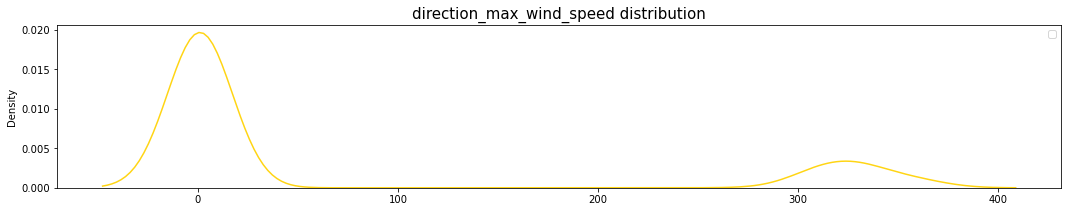

No handles with labels found to put in legend.


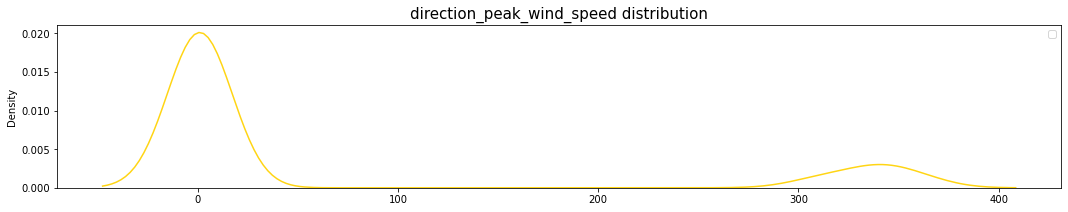

No handles with labels found to put in legend.


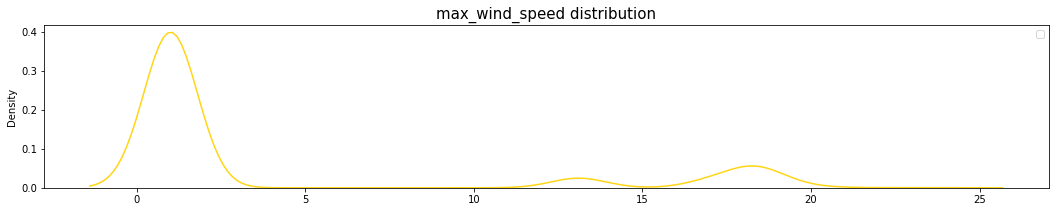

No handles with labels found to put in legend.


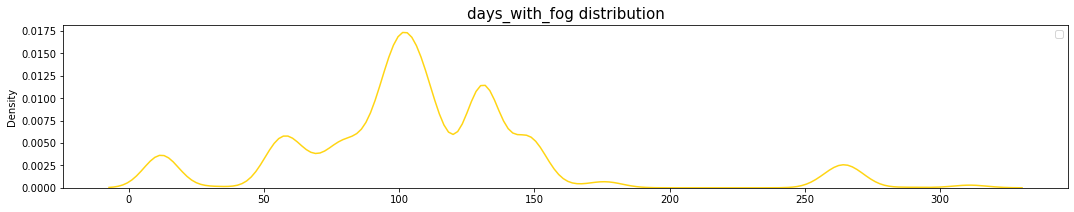

In [9]:
def kdeplot_features(df_train, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
    values_train = df_train[feature].to_numpy()
     
    plt.figure(figsize = (18, 3))
    
    sns.kdeplot(values_train, color = '#ffd514')
    
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show();
    
for feature in numerical_features:
    if (feature != "site_eui" and feature != "id"):
        kdeplot_features(train, feature=feature, title = feature + " distribution")

## floor_area
superficie (en pies cuadrados) del edificio

In [10]:
len(train.floor_area.unique())

20433

C:\Users\w10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


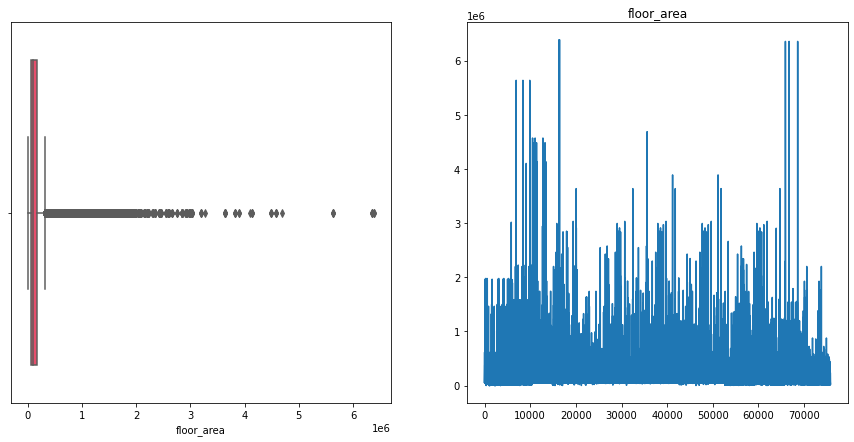

In [101]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(train.floor_area, color = '#ff355d')
plt.subplot(122)
plt.plot(train.floor_area)
plt.title('floor_area')
plt.show()

In [12]:
#Momentos
m1 = np.mean(train.floor_area)
m2 = np.sum((train.floor_area**2))/len(train.floor_area)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha={alpha}')
print(f'beta={beta}')

alpha=0.4520437559142617
beta=2.723419855163208e-06


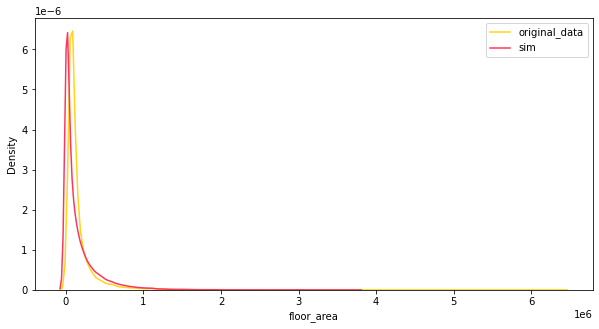

In [13]:
np.random.seed(1)
plt.figure(figsize=(10,5))
s = np.random.gamma(alpha-0.025, (1/beta), len(train.floor_area))
sns.kdeplot(train.floor_area, color = '#ffd514', label = 'original_data')
sns.kdeplot(s, color = '#ff355d', label = 'sim')
plt.legend()
plt.show()

In [14]:
scipy.stats.ks_2samp(train.floor_area,s )

KstestResult(statistic=0.3568647121718125, pvalue=0.0)

In [15]:
#train
#Skewness 
#Asimétrica positiva
print(scipy.stats.skew(train.floor_area))

#Kurtosis
print(scipy.stats.kurtosis(train.floor_area))

#distribution
#Skewness 
#Asimétrica positiva
print(scipy.stats.skew(s))

#Kurtosis
print(scipy.stats.kurtosis(s))

6.607079490213286
80.08486260851835
3.0541156065926445
13.773381810676522


<AxesSubplot:xlabel='days_below_0F', ylabel='Density'>

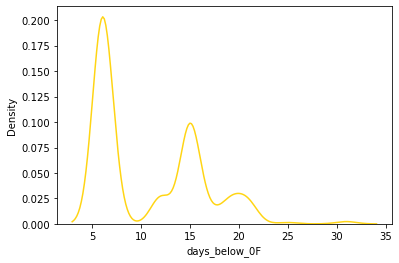

In [297]:
data = train[train.State_Factor=='State_4']
# sns.boxplot(data.days_below_0F, color = '#ff355d')
sns.kdeplot(data['days_below_0F'], color = '#ffd514', label = 'sim gamma')

In [296]:
data['days_below_0F'].unique()

array([0], dtype=int64)

In [290]:
train.State_Factor.unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

## days_below_0F *
número total de días por debajo de 0 grados Fahrenheit en la ubicación del edificio

In [102]:
len(train.days_below_0F.unique())

19

In [103]:
list(train.days_below_0F.unique())

[0, 2, 5, 22, 25, 19, 29, 31, 17, 15, 20, 21, 7, 6, 12, 1, 3, 4, 8]

In [104]:
train.days_below_0F.isna().sum()

0

In [276]:
len(train[train.days_below_0F<10])

73777

In [105]:
len(train[train.days_below_0F==31])

25

C:\Users\w10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


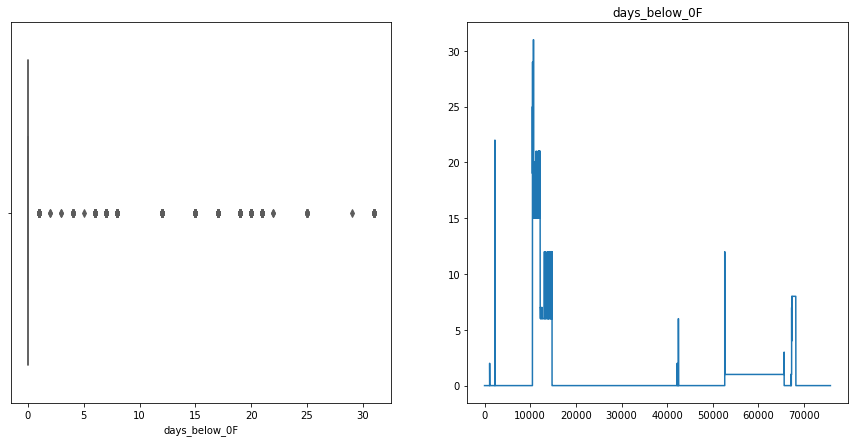

In [106]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(train.days_below_0F, color = '#ff355d')
plt.subplot(122)
plt.plot(train.days_below_0F)
plt.title('days_below_0F')
plt.show()

alpha = 0.09176998629854553
beta = 0.10466898800106765


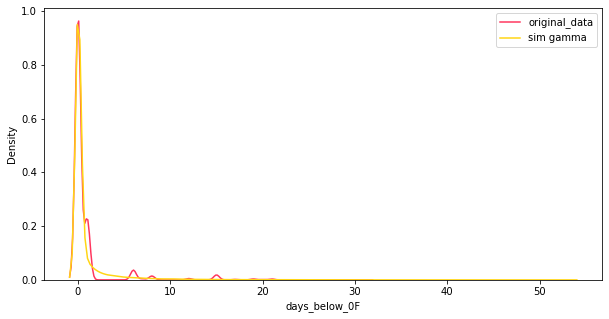

In [107]:
#Gamma
m1 = np.mean(train.days_below_0F)
m2 = np.sum((train.days_below_0F**2))/len(train.days_below_0F)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha = {alpha}')
print(f'beta = {beta}')
plt.figure(figsize=(10,5))
np.random.seed(60)
s = np.random.gamma(alpha, 1/beta, len(train.days_below_0F))
#Poisson
theta = np.mean(train.days_below_0F)
sns.kdeplot(train.days_below_0F, color = '#ff355d', label = 'original_data')
sns.kdeplot(s, color = '#ffd514', label = 'sim gamma')
plt.legend()
plt.show()

In [177]:
def gam(a, b, k):
    db0 = []
    i = 1
    while i<=k:
        g = np.rint(np.random.gamma(a, 1/b, 1)[0])
        if g<=31:
            db0.append(g)
            i = i+1
    return db0

In [181]:
len(train.days_below_0F)

75757

alpha = 0.09176998629854553
beta = 0.10466898800106765


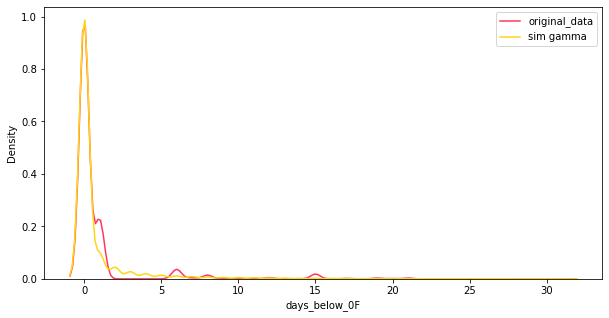

In [199]:
#Gamma
m1 = np.mean(train.days_below_0F)
m2 = np.sum((train.days_below_0F**2))/len(train.days_below_0F)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha = {alpha}')
print(f'beta = {beta}')
plt.figure(figsize=(10,5))
np.random.seed(10)
g = gam(alpha, beta-0.015, len(train.days_below_0F))
#Poisson
theta = np.mean(train.days_below_0F)
sns.kdeplot(train.days_below_0F, color = '#ff355d', label = 'original_data')
sns.kdeplot(g, color = '#ffd514', label = 'sim gamma')
plt.legend()
plt.show()

In [202]:
scipy.stats.ks_2samp(train.days_below_0F, g)

KstestResult(statistic=0.06743931253877522, pvalue=3.145406263634342e-150)

## days_above_100F
número total de días por arriba de 100 grados Fahrenheit en la ubicación del edificio

In [203]:
len(train.days_above_100F.unique())

40

In [204]:
train.days_above_100F.unique()

array([  0,   1, 119,  12,   5,  30,   2,  29,  20,  32,  34,  43,   7,
        11,  24,   3,  18,   9,  13,   8,  95,  14,  17,  26,  28,  31,
        42,  48,  21,  15,  16, 115,  10, 117,  36,  45,  27,  22,  39,
        37], dtype=int64)

In [205]:
len(train[train.days_above_100F>31])

62

C:\Users\w10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


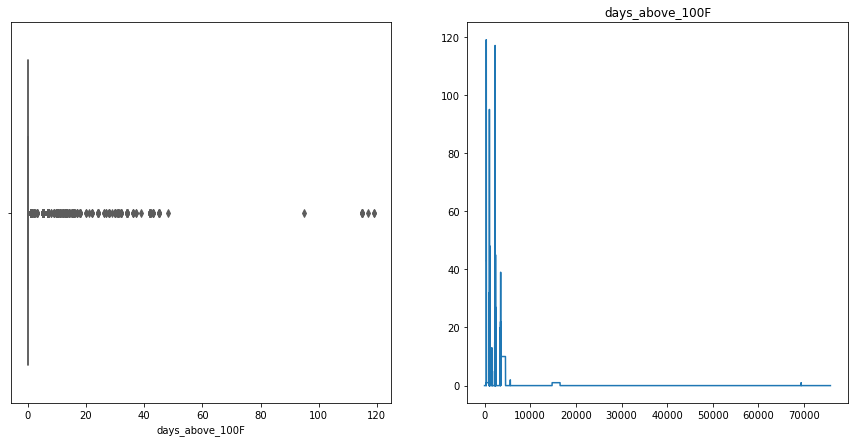

In [206]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(train.days_above_100F, color = '#ff355d')
plt.subplot(122)
plt.plot(train.days_above_100F)
plt.title('days_above_100F')
plt.show()

In [207]:
a_100F = train[train.days_above_100F<=31]
len(a_100F.days_above_100F.unique())

27

alpha = 0.02440160719212089
beta = 0.10253578641099095


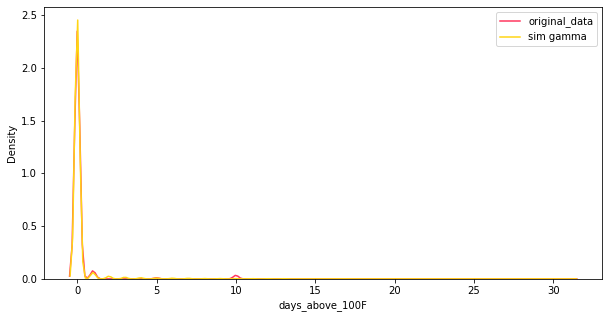

In [208]:
#Gamma
m1 = np.mean(a_100F.days_above_100F)
m2 = np.sum((a_100F.days_above_100F**2))/len(a_100F.days_above_100F)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha = {alpha}')
print(f'beta = {beta}')
plt.figure(figsize=(10,5))
np.random.seed(60)
g_a100 = gam(alpha, beta, len(a_100F.days_above_100F))
sns.kdeplot(a_100F.days_above_100F, color = '#ff355d', label = 'original_data')
sns.kdeplot(g_a100, color = '#ffd514', label = 'sim gamma')
plt.legend()
plt.show()

In [277]:
# scipy.stats.ks_2samp(a_100F.days_above_100F,g_a100)

alpha = 0.015403789307269716
beta = 0.05510435220053982


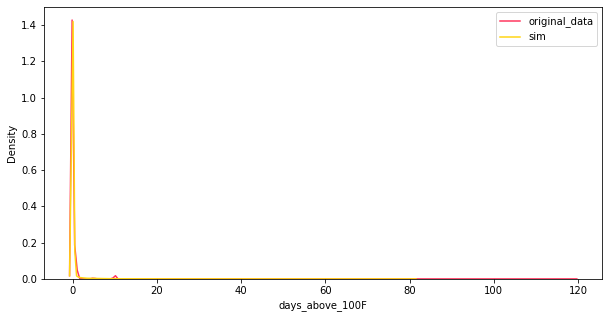

In [40]:
m1 = np.mean(train.days_above_100F)
m2 = np.sum((train.days_above_100F**2))/len(train.days_above_100F)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha = {alpha}')
print(f'beta = {beta}')
plt.figure(figsize=(10,5))
np.random.seed(60)
s = np.random.gamma(alpha, 1/beta, len(train.days_above_100F))
sns.kdeplot(train.days_above_100F, color = '#ff355d', label = 'original_data')
sns.kdeplot(s, color = '#ffd514', label = 'sim')
plt.legend()
plt.show()

In [42]:
scipy.stats.ks_2samp(train.days_above_100F,s)

KstestResult(statistic=0.9463415921961007, pvalue=0.0)

## direction_max_wind_speed
dirección del viento para la velocidad máxima del viento en la ubicación del edificio. Dado en direcciones de punto de brújula de 360 ​​grados (por ejemplo, 360 = norte, 180 = sur, etc.)

In [218]:
list(train.direction_max_wind_speed.unique())

[1.0, nan, 270.0, 360.0, 300.0, 320.0, 330.0, 340.0, 280.0, 310.0, 350.0]

In [219]:
train.direction_max_wind_speed.isna().sum()/len(train.direction_max_wind_speed)

0.5422865213775625

In [220]:
len(train[train.direction_max_wind_speed==1])/len(train.direction_max_wind_speed)

0.3659595812928178

In [221]:
train[train.direction_max_wind_speed==1]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73151,6,State_11,Residential,Mixed_Use_Commercial_and_Residential,87458.0,1966.0,NaN,57.3,28,43.451613,...,25,3,0,0,1.0,1.0,1.0,261.0,96.643431,73151
73152,6,State_11,Commercial,Office_Uncategorized,162157.0,2005.0,NaN,57.3,28,43.451613,...,25,3,0,0,1.0,1.0,1.0,261.0,249.783867,73152
73153,6,State_11,Commercial,Office_Uncategorized,187027.0,2014.0,NaN,57.3,28,43.451613,...,25,3,0,0,1.0,1.0,1.0,261.0,24.430445,73153
73154,6,State_11,Commercial,Commercial_Other,56988.0,2014.0,NaN,57.3,28,43.451613,...,25,3,0,0,1.0,1.0,1.0,261.0,9.523002,73154


In [278]:
train.State_Factor.unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

## direction_peak_wind_speed
dirección del viento para la velocidad máxima de ráfagas de viento en la ubicación del edificio. Dado en direcciones de punto de brújula de 360 ​​grados (por ejemplo, 360 = norte, 180 = sur, etc.).

In [222]:
list(train.direction_peak_wind_speed.unique())

[1.0, nan, 270.0, 320.0, 340.0, 360.0, 330.0, 310.0, 350.0]

In [223]:
train.direction_peak_wind_speed.isna().sum()/len(train.direction_peak_wind_speed)

0.5519093945113983

In [224]:
len(train[train.direction_peak_wind_speed==1])/len(train.direction_peak_wind_speed)

0.3656295787847988

## energy_star_rating
la calificación Energy Star del edificio

In [236]:
len(train.energy_star_rating.unique())    

102

C:\Users\w10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


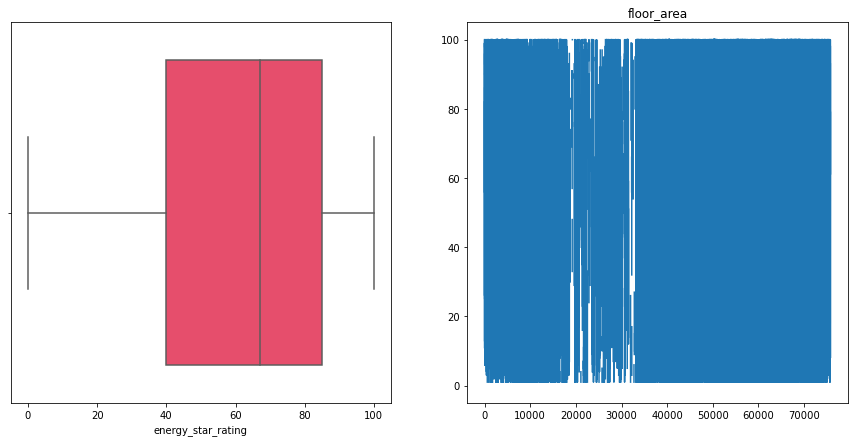

In [237]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(train.energy_star_rating, color = '#ff355d')
plt.subplot(122)
plt.plot(train.energy_star_rating)
plt.title('floor_area')
plt.show()

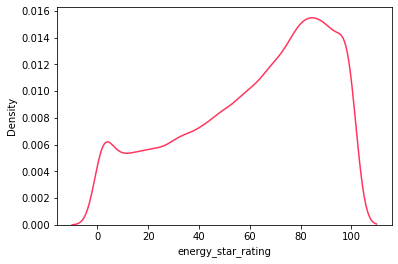

In [238]:
sns.kdeplot(train.energy_star_rating, color = '#ff355d', label = 'original_data')
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(train.direction_max_wind_speed, color = '#ff355d')
plt.subplot(122)
plt.plot(train.direction_max_wind_speed)
plt.title('direction_max_wind_speed')
plt.show()

In [ ]:
m1 = np.mean(train.days_above_110F)
m2 = np.sum((train.days_above_110F**2))/len(train.days_above_110F)
alpha = (m1**2)/(m2-m1**2)
beta = alpha/m1
print(f'alpha = {alpha}')
print(f'beta = {beta}')
plt.figure(figsize=(10,5))
np.random.seed(60)
s = np.random.gamma(alpha, 1/beta, len(train.days_above_110F))
sns.kdeplot(train.days_above_110F, color = '#ff355d', label = 'original_data')
sns.kdeplot(s, color = '#ffd514', label = 'sim')
plt.legend()
plt.show()

In [ ]:
beta

In [ ]:
q1 = np.percentile(train.floor_area, 25)
q3 = np.percentile(train.floor_area, 75)
rango = q3-q1
umbral_sup = q3+1.5*rango
umbral_inf = q1-1.5*rango
#Imputar el cuantil al 95% si el valor es >umbral_sup y el cuantil al 5% si es < al umbral_inf

In [ ]:
train.floor_area[train.floor_area>np.percentile(train.floor_area, 95)]

## year_built

In [ ]:
train.groupby(['year_built'])['id'].count()

In [ ]:
train.energy_star_rating.iloc[:1000].plot()

In [ ]:
train.year_built.plot()

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(131)
sns.kdeplot(train.year_built, color = '#ffd514')
plt.subplot(132)
sns.boxplot(train.year_built, color = '#ff355d')
plt.subplot(133)
plt.hist(train.year_built[train.year_built>1700], bins = 40)

In [298]:
fac = train[['Year_Factor', 'State_Factor', 'building_class', 'facility_type']]
train_num = train.drop(fac, axis = 1)
train_num.head()

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [299]:
train.corr().style.background_gradient(cmap="Pastel1")

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,-0.093735,-0.054079,0.051545,0.167406,-0.463176,-0.164931,-0.212332,-0.274205,-0.196895,0.114799,-0.309140,-0.097698,-0.406461,-0.103637,-0.190931,-0.408861,-0.072133,0.171693,0.338786,0.095091,0.180126,-0.078937,-0.097073,-0.144199,-0.062649,0.148017,0.360374,0.355420,-0.260890,-0.119175,-0.323793,0.032302,0.068750,-0.124418,0.182135,0.087389,-0.058627,0.137436,0.260270,0.263467,0.209500,0.185233,0.054718,-0.043701,-0.013635,0.231525,0.214651,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,-0.042102,-0.121068,-0.098905,-0.011865,-0.087472,-0.100034,-0.030368,-0.057491,0.011626,0.028982,-0.023443,0.056028,0.026853,-0.009108,0.039562,0.021832,-0.007137,0.038335,0.023841,-0.013697,0.046048,0.055891,-0.102459,-0.059559,0.020746,-0.112179,-0.071890,0.026904,-0.085844,-0.059289,0.004669,0.045823,0.130198,0.062634,0.092503,0.074091,-0.111303,0.136123,0.135476,0.138712,0.140324,0.049897,0.022583,-0.031415,-0.009205,-0.000018,-0.003984,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.011210,-0.032846,-0.080230,-0.000619,-0.020201,0.010372,-0.045171,-0.029848,-0.002352,-0.045250,-0.077966,-0.000861,-0.097668,-0.079245,-0.051633,-0.081202,-0.031165,0.006919,-0.093093,-0.052909,-0.036653,-0.103230,-0.048845,0.015295,-0.122823,-0.092156,-0.102312,-0.066947,-0.126027,-0.104420,-0.061495,-0.066770,-0.009608,-0.068626,-0.075244,-0.077388,-0.065614,0.073192,0.051926,-0.049473,-0.048279,-0.112555,0.046627,0.041619,0.063447,0.053247,-0.035519,-0.005065,-0.054164,nan,0.001168,-0.009591,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.144452,0.149421,0.081703,0.126411,0.137479,0.104399,0.134648,0.137160,0.077333,0.105996,0.100951,0.101430,-0.021194,-0.072969,0.005743,-0.039391,-0.106010,0.056200,-0.093468,-0.107087,-0.006585,-0.080867,-0.093280,-0.027211,-0.047610,-0.087785,-0.062982,0.076621,0.049684,0.037285,0.096028,0.067282,-0.012538,0.024659,0.026105,-0.050553,-0.098710,-0.133304,-0.109899,-0.140722,-0.111075,0.086425,-0.132442,-0.113404,-0.076361,-0.019048,-0.074993,0.019541,0.059382,nan,-0.000992,0.002014,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.255502,-0.233452,-0.345130,-0.153185,-0.184543,0.027383,-0.285815,-0.112014,0.068679,-0.176678,-0.258460,0.069062,-0.297420,-0.133906,0.075345,-0.416738,-0.080968,0.168690,-0.430781,-0.187750,-0.126061,-0.370227,-0.106940,0.059348,-0.204802,-0.014956,0.029897,-0.205325,-0.179472,-0.021019,-0.293057,-0.074790,0.206576,-0.399870,-0.276819,-0.207183,-0.109070,0.264434,-0.043577,0.009727,0.046208,-0.326495,0.309669,0.395252,0.561204,0.618740,0.062014,0.184423,0.104934,0.077188,0.050804,0.074144,0.040172,0.495345,0.011798,-0.201664
january_min_temp,0.007913,-0.148467,-0.011210,0.144452,-0.255502,1.000

In [ ]:
sns.pairplot(train_num[['avg_temp', 'january_avg_temp', 'january_max_temp', ]])